In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv("Mumbai_House_Prices.csv")
df1.head()

,size,type,location,total_sqft,price,price_unit,region,availability,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New


In [3]:
df1.shape

(76038, 9)

In [4]:
df1.columns

Index(['size', 'type', 'location', 'total_sqft', 'price', 'price_unit',
       'region', 'availability', 'age'],
      dtype='object')

In [5]:
df2 = df1.drop(['type','location','age','availability'],axis='columns')
df2.shape

(76038, 5)

In [6]:
df2.head()

,size,total_sqft,price,price_unit,region
0,3,685,2.50,Cr,Andheri West
1,2,640,52.51,L,Naigaon East
2,2,610,1.73,Cr,Borivali West
3,2,876,59.98,L,Panvel
4,2,659,94.11,L,Mira Road East


In [7]:
df2['price_unit'].unique()

array(['Cr', 'L'], dtype=object)

In [8]:
df2['price_unit'].value_counts()

Cr    40981
L     35057
Name: price_unit, dtype: int64

In [9]:
df2.drop(df2.index[(df2["price_unit"] == "L")],axis=0,inplace=True)

In [10]:
df2

,size,total_sqft,price,price_unit,region
0,3,685,2.50,Cr,Andheri West
2,2,610,1.73,Cr,Borivali West
5,2,826,3.30,Cr,Parel
6,5,2921,1.99,Cr,Boisar
7,3,778,2.89,Cr,Santacruz East
...,...,...,...,...,...
76033,3,1527,7.00,Cr,Juhu
76034,5,3049,12.00,Cr,Juhu
76035,4,3313,10.00,Cr,Napeansea Road
76036,2,1305,4.25,Cr,Bandra East


In [11]:
df2.shape

(40981, 5)

In [12]:
df2.isnull().sum()

size          0
total_sqft    0
price         0
price_unit    0
region        0
dtype: int64

In [13]:
df2.drop("price_unit",axis=1,inplace=True)

In [14]:
df2.head()

,size,total_sqft,price,region
0,3,685,2.50,Andheri West
2,2,610,1.73,Borivali West
5,2,826,3.30,Parel
6,5,2921,1.99,Boisar
7,3,778,2.89,Santacruz East


In [15]:
df2.total_sqft.unique()

array([ 685,  610,  826, ..., 1974, 1634, 3049], dtype=int64)

In [16]:
df3 = df2.copy()
df3['price_per_sqft'] = df3['price']*1000000/df3['total_sqft']
df3.head()

,size,total_sqft,price,region,price_per_sqft
0,3,685,2.50,Andheri West,3649.635036
2,2,610,1.73,Borivali West,2836.065574
5,2,826,3.30,Parel,3995.157385
6,5,2921,1.99,Boisar,681.273536
7,3,778,2.89,Santacruz East,3714.652956


In [17]:
df3_stats = df3['price_per_sqft'].describe()
df3_stats

count    40981.000000
mean      2011.315496
std        954.241254
min        214.285714
25%       1358.974359
50%       1814.814815
75%       2400.000000
max      18230.769231
Name: price_per_sqft, dtype: float64

In [18]:
len(df3.region.unique())

151

In [19]:
df3.region.unique()

array(['Andheri West', 'Borivali West', 'Parel', 'Boisar',
       'Santacruz East', 'Fort', 'Chembur', 'Jogeshwari West', 'Powai',
       'Ghansoli', 'Thane West', 'Vikhroli', 'Airoli', 'Borivali East',
       'Kharghar', 'Panvel', 'Jogeshwari East', 'Mulund West',
       'Goregaon West', 'Ghatkopar East', 'Ulwe', 'Mira Road East',
       'Vasai', 'Kalamboli', 'Kandivali East', 'Kurla', 'Andheri East',
       'Vashi', 'Malad West', 'Dadar West', 'Kandivali West', 'Mahim',
       'Nala Sopara', 'Bandra West', 'Mulund East', 'Ghatkopar West',
       'Agripada', 'Owale', 'Ville Parle East', 'Santacruz West', 'Nerul',
       'Kanjurmarg', 'Khar', 'Sewri', 'Prabhadevi', 'Matunga',
       'Lower Parel', 'Koper Khairane', 'Napeansea Road', 'Bhandup West',
       'Dahisar', 'Wadala', 'Sion', 'Bhayandar East', 'Cuffe Parade',
       'Girgaon', 'Byculla', 'Bhiwandi', 'Tardeo', 'Malad East', 'Colaba',
       'Goregaon East', 'Dombivali', 'Thane East', 'Kalyan West',
       'Kamothe', 'Deonar', 'N

In [20]:
df3.rename(columns={"region": "location"}, inplace=True)
df3

,size,total_sqft,price,location,price_per_sqft
0,3,685,2.50,Andheri West,3649.635036
2,2,610,1.73,Borivali West,2836.065574
5,2,826,3.30,Parel,3995.157385
6,5,2921,1.99,Boisar,681.273536
7,3,778,2.89,Santacruz East,3714.652956
...,...,...,...,...,...
76033,3,1527,7.00,Juhu,4584.151932
76034,5,3049,12.00,Juhu,3935.716628
76035,4,3313,10.00,Napeansea Road,3018.412315
76036,2,1305,4.25,Bandra East,3256.704981


In [21]:
df3.location = df3.location.apply(lambda x: x.strip())
location_stats = df3['location'].value_counts(ascending=False)
location_stats

Thane West        11071
Kandivali East     1964
Mira Road East     1750
Kharghar           1602
Andheri West       1487
                  ...  
Churchgate            1
Kamathipura           1
Dombivali East        1
sector                1
Bandra                1
Name: location, Length: 151, dtype: int64

In [22]:
df3[df3.total_sqft/df3.size<300].head()

,size,total_sqft,price,location,price_per_sqft
0,3,685,2.50,Andheri West,3649.635036
2,2,610,1.73,Borivali West,2836.065574
5,2,826,3.30,Parel,3995.157385
6,5,2921,1.99,Boisar,681.273536
7,3,778,2.89,Santacruz East,3714.652956


In [23]:
df3.shape

(40981, 5)

In [24]:
df3.rename(columns={"size": "bhk"}, inplace=True)
df3

,bhk,total_sqft,price,location,price_per_sqft
0,3,685,2.50,Andheri West,3649.635036
2,2,610,1.73,Borivali West,2836.065574
5,2,826,3.30,Parel,3995.157385
6,5,2921,1.99,Boisar,681.273536
7,3,778,2.89,Santacruz East,3714.652956
...,...,...,...,...,...
76033,3,1527,7.00,Juhu,4584.151932
76034,5,3049,12.00,Juhu,3935.716628
76035,4,3313,10.00,Napeansea Road,3018.412315
76036,2,1305,4.25,Bandra East,3256.704981


In [25]:
df3 = df3[~(df3.total_sqft/df3.bhk<300)]
df3.shape

(39022, 5)

In [26]:
df3.price_per_sqft.describe()

count    39022.000000
mean      1989.555987
std        963.041648
min        214.285714
25%       1335.326697
50%       1776.886302
75%       2366.666667
max      18230.769231
Name: price_per_sqft, dtype: float64

In [27]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df4 = remove_pps_outliers(df3)
df4.shape

(28540, 5)

In [28]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df5 = remove_bhk_outliers(df4)
df5.shape

(15846, 5)

Text(0, 0.5, 'Count')

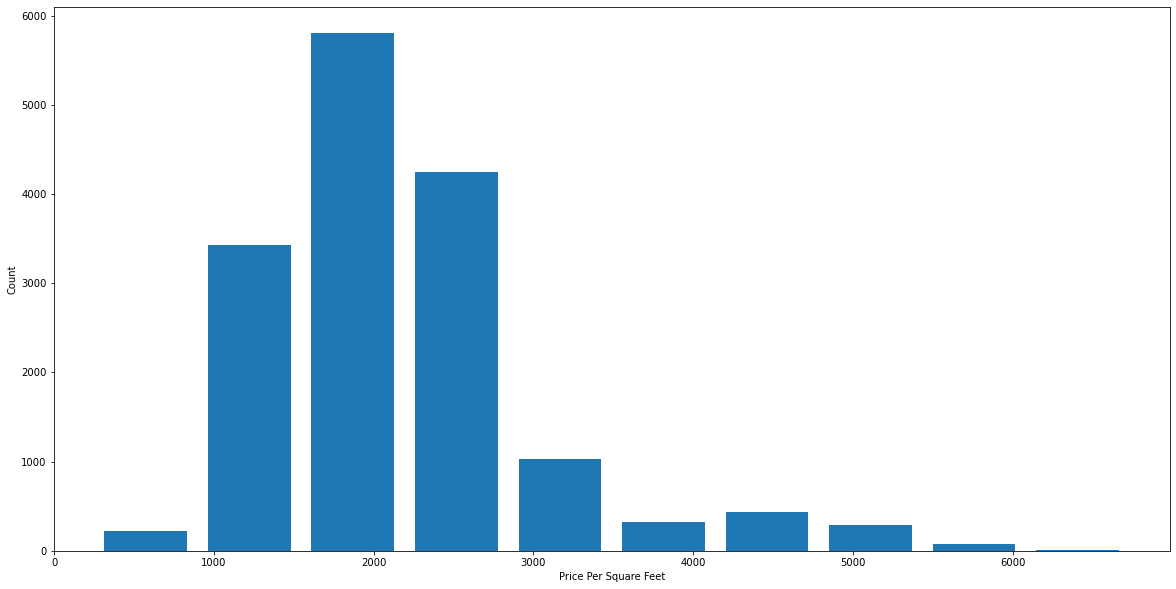

In [29]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df5.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [30]:
df5.drop("price_per_sqft",axis=1,inplace=True)
df5.head()

,bhk,total_sqft,price,location
0,2,650,2.62,Agripada
1,1,803,2.25,Agripada
2,1,684,1.70,Agripada
3,1,545,1.60,Agripada
10,4,3454,12.50,Agripada


In [31]:
dummies = pd.get_dummies(df5.location)
dummies.head()

,Agripada,Airoli,Ambernath West,Andheri East,Andheri West,Anjurdive,Babulnath Road,Badlapur West,Bandra East,Bandra Kurla Complex,...,Vasai,Vashi,Vikhroli,Vikroli East,Ville Parle East,Ville Parle West,Virar,Wadala,Worli,kandivali
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df6 = pd.concat([df5,dummies.drop('kandivali',axis='columns')],axis='columns')
df6.head()

,bhk,total_sqft,price,location,Agripada,Airoli,Ambernath West,Andheri East,Andheri West,Anjurdive,...,Ulwe,Vasai,Vashi,Vikhroli,Vikroli East,Ville Parle East,Ville Parle West,Virar,Wadala,Worli
0,2,650,2.62,Agripada,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,803,2.25,Agripada,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,684,1.70,Agripada,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,545,1.60,Agripada,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,4,3454,12.50,Agripada,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df7 = df6.drop('location',axis='columns')
df7.head()

,bhk,total_sqft,price,Agripada,Airoli,Ambernath West,Andheri East,Andheri West,Anjurdive,Babulnath Road,...,Ulwe,Vasai,Vashi,Vikhroli,Vikroli East,Ville Parle East,Ville Parle West,Virar,Wadala,Worli
0,2,650,2.62,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,803,2.25,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,684,1.70,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,545,1.60,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,4,3454,12.50,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df7.shape

(15846, 123)

In [35]:
X = df7.drop(['price'],axis='columns')
X.head(3)

,bhk,total_sqft,Agripada,Airoli,Ambernath West,Andheri East,Andheri West,Anjurdive,Babulnath Road,Badlapur West,...,Ulwe,Vasai,Vashi,Vikhroli,Vikroli East,Ville Parle East,Ville Parle West,Virar,Wadala,Worli
0,2,650,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,803,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,684,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
X.shape

(15846, 122)

In [37]:
y = df7.price
y.head(3)

0    2.62
1    2.25
2    1.70
Name: price, dtype: float64

In [38]:
len(y)

15846

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [40]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8687373744119067

In [41]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.84532152, 0.83390567, 0.85338436, 0.85662465, 0.86667917])

In [42]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.851183,{'normalize': False}
1,lasso,0.591827,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.943285,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [43]:
X.columns

Index(['bhk', 'total_sqft', 'Agripada', 'Airoli', 'Ambernath West',
       'Andheri East', 'Andheri West', 'Anjurdive', 'Babulnath Road',
       'Badlapur West',
       ...
       'Ulwe', 'Vasai', 'Vashi', 'Vikhroli', 'Vikroli East',
       'Ville Parle East', 'Ville Parle West', 'Virar', 'Wadala', 'Worli'],
      dtype='object', length=122)

In [44]:
def predict_price(bhk,sqft,location):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bhk
    x[1] = sqft
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [45]:
predict_price(2,600,'Andheri West')

2.0191598187900826

In [46]:
predict_price(1,300,'Wadala')

1.079875118816876

In [47]:
import pickle
with open('Mumbai_house_prediction_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [48]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))